In [1]:
#  Insurance Premium Calculation based on age

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [4]:
df = pd.read_csv("Insurance.csv")  # reading the dataset 
df.head() 

,Age,Insurance Premium (Rs)
0,25,4500
1,30,5000
2,35,6000
3,40,8000
4,45,11000


In [5]:
print(df.shape) 

(10, 2)


In [6]:
df.columns = ["age" , "insurance"]  # renaming the columns 

In [7]:
df.isna().sum() # checking for any missing values 

age          0
insurance    0
dtype: int64

###  Plotting datapoints 

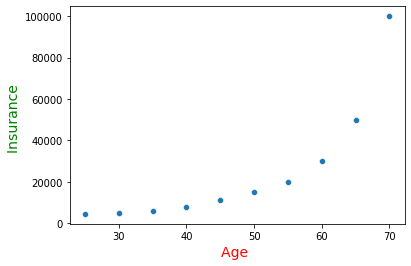

In [8]:
sns.scatterplot(x = "age" , y = "insurance" , data =df ) 
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )
plt.show() 

In [9]:
# From above scatter plot , it looks like there is not a linear relationship between x and y 

# Using Linear regression 

In [11]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

x = df.age.values.reshape(-1 , 1 )
print(x)
y = df.insurance.values.reshape(-1 , 1 ) 


[[25]
 [30]
 [35]
 [40]
 [45]
 [50]
 [55]
 [60]
 [65]
 [70]]


In [10]:
model = LinearRegression() 
model.fit(x , y) 

LinearRegression()

In [11]:
accuracy = model.score(x , y )
print(round(accuracy *100  , 2 )) 

66.9


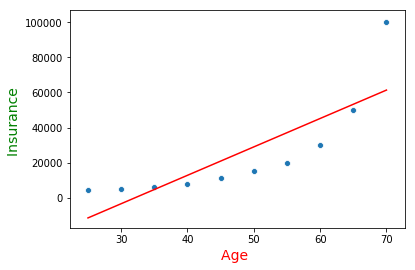

In [12]:
# Plotting datapoints for linear regression 
y_pred = model.predict(x)  
plt.plot(x , y_pred, color = "red" )
sns.scatterplot(x = "age" , y = "insurance" , data =df ) 
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )

plt.show() 

<h1 style = "color : green ; font-family : monospace" > Using Polynomial Regression </h1>

### Degree 2 

In [13]:
from sklearn.preprocessing import PolynomialFeatures 

In [14]:
poly_feature_2 = PolynomialFeatures(degree =2 ) 
poly_x = poly_feature_2.fit_transform(x) 
poly_x

array([[1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 7.000e+01, 4.900e+03]])

In [15]:
poly_model_2 = LinearRegression()
poly_model_2.fit(poly_x , y )

print (round (poly_model_2.score(poly_x , y ) * 100 , 2 ) )
y_pred = poly_model_2.predict(poly_x ) 

91.62


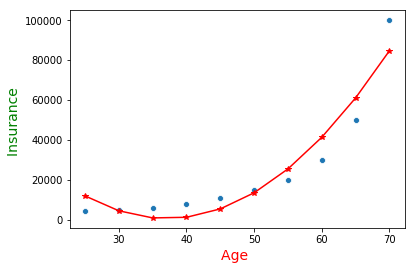

In [16]:
#  Plotting datapoints for degree 2 

sns.scatterplot(x = "age" , y = "insurance" , data = df ) 
plt.plot (x , y_pred , color = "red" , marker = "*")
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )
plt.show() 

### Degree 3 

In [17]:
poly_feature_3 = PolynomialFeatures(degree = 3 )
poly_x = poly_feature_3.fit_transform(x)
poly_x

array([[1.00000e+00, 2.50000e+01, 6.25000e+02, 1.56250e+04],
       [1.00000e+00, 3.00000e+01, 9.00000e+02, 2.70000e+04],
       [1.00000e+00, 3.50000e+01, 1.22500e+03, 4.28750e+04],
       [1.00000e+00, 4.00000e+01, 1.60000e+03, 6.40000e+04],
       [1.00000e+00, 4.50000e+01, 2.02500e+03, 9.11250e+04],
       [1.00000e+00, 5.00000e+01, 2.50000e+03, 1.25000e+05],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05]])

In [18]:
poly_model_3 = LinearRegression()
poly_model_3.fit(poly_x , y )

print (round (poly_model_3.score(poly_x , y ) * 100 , 2 ) )
y_pred = poly_model_3.predict(poly_x) 

98.12


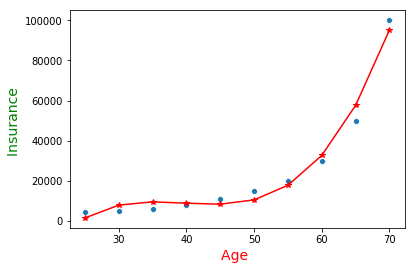

In [19]:
#  Plotting datapoints for degree 3 

sns.scatterplot(x = "age" , y = "insurance" , data = df ) 
plt.plot (x , y_pred , color = "red" , marker = "*")
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )
plt.show() 

In [20]:
# predicting insurance for ages 29, 45, 53 and 80

test_age = np.array([29 , 45 , 53, 80 ]).reshape(-1 , 1 )
poly_test_age = poly_feature_3.fit_transform(test_age)

poly_pred = poly_model_3.predict(poly_test_age)
print ("Age - >   Insurance  " )
for i , j in zip(test_age , poly_pred) :
    print( i[0] , j[0] , sep = "  - > " )

Age - >   Insurance  
29  - > 7059.198135079583
45  - > 8327.039627083868
53  - > 14075.589743623219
80  - > 217503.03030341858


### Degree 4 

In [21]:
poly_feature_4 = PolynomialFeatures(degree = 4 )
poly_x = poly_feature_4.fit_transform(x)
poly_x

array([[1.0000000e+00, 2.5000000e+01, 6.2500000e+02, 1.5625000e+04,
        3.9062500e+05],
       [1.0000000e+00, 3.0000000e+01, 9.0000000e+02, 2.7000000e+04,
        8.1000000e+05],
       [1.0000000e+00, 3.5000000e+01, 1.2250000e+03, 4.2875000e+04,
        1.5006250e+06],
       [1.0000000e+00, 4.0000000e+01, 1.6000000e+03, 6.4000000e+04,
        2.5600000e+06],
       [1.0000000e+00, 4.5000000e+01, 2.0250000e+03, 9.1125000e+04,
        4.1006250e+06],
       [1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06],
       [1.0000000e+00, 5.5000000e+01, 3.0250000e+03, 1.6637500e+05,
        9.1506250e+06],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 6.5000000e+01, 4.2250000e+03, 2.7462500e+05,
        1.7850625e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07]])

In [22]:
poly_model_4 = LinearRegression()
poly_model_4.fit(poly_x , y )

print (round (poly_model_4.score(poly_x , y ) * 100 , 2 ) )
y_pred = poly_model_4.predict(poly_x) 

99.74


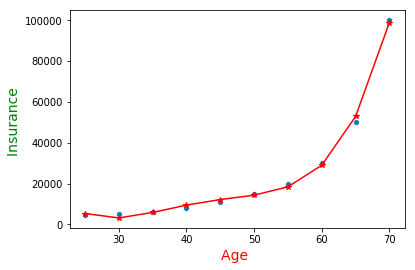

In [23]:
#  Plotting datapoints for degree 4

sns.scatterplot(x = "age" , y = "insurance" , data = df ) 
plt.plot (x , y_pred , color = "red" , marker = "*")
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )
plt.show() 

### Degree 10

In [24]:
poly_feature_10 = PolynomialFeatures(degree = 10 )
poly_x = poly_feature_10.fit_transform(x)
poly_x

array([[1.00000000e+00, 2.50000000e+01, 6.25000000e+02, 1.56250000e+04,
        3.90625000e+05, 9.76562500e+06, 2.44140625e+08, 6.10351562e+09,
        1.52587891e+11, 3.81469727e+12, 9.53674316e+13],
       [1.00000000e+00, 3.00000000e+01, 9.00000000e+02, 2.70000000e+04,
        8.10000000e+05, 2.43000000e+07, 7.29000000e+08, 2.18700000e+10,
        6.56100000e+11, 1.96830000e+13, 5.90490000e+14],
       [1.00000000e+00, 3.50000000e+01, 1.22500000e+03, 4.28750000e+04,
        1.50062500e+06, 5.25218750e+07, 1.83826562e+09, 6.43392969e+10,
        2.25187539e+12, 7.88156387e+13, 2.75854735e+15],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04,
        2.56000000e+06, 1.02400000e+08, 4.09600000e+09, 1.63840000e+11,
        6.55360000e+12, 2.62144000e+14, 1.04857600e+16],
       [1.00000000e+00, 4.50000000e+01, 2.02500000e+03, 9.11250000e+04,
        4.10062500e+06, 1.84528125e+08, 8.30376562e+09, 3.73669453e+11,
        1.68151254e+13, 7.56680643e+14, 3.40506289e+

In [25]:
poly_model_10 = LinearRegression()
poly_model_10.fit(poly_x , y )

print (round (poly_model_10.score(poly_x , y ) * 100 , 2 ) )
y_pred = poly_model_10.predict(poly_x)

100.0


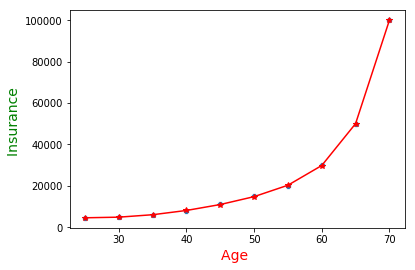

In [26]:
# Plotting datapoints for degree 10 

sns.scatterplot(x = "age" , y = "insurance" , data = df ) 
plt.plot (x , y_pred , color = "red" , marker = "*")
plt.xlabel("Age ",  color = "Red" , fontsize = 14 )
plt.ylabel("Insurance " , color = "Green" , fontsize = 14 )
plt.show() 